_Lambda School Data Science_

# Make Explanatory Visualizations

### Objectives

- identify misleading visualizations and how to fix them
- use Seaborn to visualize distributions and relationships with continuous and discrete variables
- add emphasis and annotations to transform visualizations from exploratory to explanatory
- remove clutter from visualizations

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

# Avoid Misleading Visualizations

Did you find/discuss any interesting misleading visualizations in your Walkie Talkie?

## What makes a visualization misleading?

[5 Ways Writers Use Misleading Graphs To Manipulate You](https://venngage.com/blog/misleading-graphs/)

## Two y-axes

<img src="https://kieranhealy.org/files/misc/two-y-by-four-sm.jpg" width="800">
 
 Other Examples: 
 - [Spurious Correlations](https://tylervigen.com/spurious-correlations)
 - <https://blog.datawrapper.de/dualaxis/>
 - <https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/>
 - <http://www.storytellingwithdata.com/blog/2016/2/1/be-gone-dual-y-axis>

##  Y-axis doesn't start at zero.

<img src="https://i.pinimg.com/originals/22/53/a9/2253a944f54bb61f1983bc076ff33cdd.jpg" width="600">

## Pie Charts are bad

<img src="https://i1.wp.com/flowingdata.com/wp-content/uploads/2009/11/Fox-News-pie-chart.png?fit=620%2C465&ssl=1" width="600">

## Pie charts that omit data are extra bad
 
- A guy makes a misleading chart that goes viral

 What does this chart imply at first glance? You don't want your user to have to do a lot of work in order to be able to interpret you graph correctly. You want that first-glance conclusions to be the correct ones.

 <img src="https://pbs.twimg.com/media/DiaiTLHWsAYAEEX?format=jpg&name=medium" width='600'>
 
 <https://twitter.com/michaelbatnick/status/1019680856837849090?lang=en>
 
- It gets picked up by overworked journalists (assuming incompetency before malice)
 
 <https://www.marketwatch.com/story/this-1-chart-puts-mega-techs-trillions-of-market-value-into-eye-popping-perspective-2018-07-18>
 
- Even after the chart's implications have been refuted, it's hard a bad (although compelling) visualization from being passed around.

 <https://www.linkedin.com/pulse/good-bad-pie-charts-karthik-shashidhar/>

**["yea I understand a pie chart was probably not the best choice to present this data."](https://twitter.com/michaelbatnick/status/1037036440494985216)**

## Pie Charts that compare unrelated things are next-level extra bad

<img src="http://www.painting-with-numbers.com/download/document/186/170403+Legalizing+Marijuana+Graph.jpg" width="600">


## Be careful about how you use volume to represent quantities:

radius vs diameter vs volume

<img src="https://static1.squarespace.com/static/5bfc8dbab40b9d7dd9054f41/t/5c32d86e0ebbe80a25873249/1546836082961/5474039-25383714-thumbnail.jpg?format=1500w" width="600">

## Don't cherrypick timelines or specific subsets of your data:

<img src="https://wattsupwiththat.com/wp-content/uploads/2019/02/Figure-1-1.png" width="600">

Look how specifically the writer has selected what years to show in the legend on the right side.

<https://wattsupwiththat.com/2019/02/24/strong-arctic-sea-ice-growth-this-year/>

Try the tool that was used to make the graphic for yourself

<http://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/>
                                                                                           

## Use Relative units rather than Absolute Units

<img src="https://imgs.xkcd.com/comics/heatmap_2x.png" width="600">

## Avoid 3D graphs unless having the extra dimension is effective

Usually you can Split 3D graphs into multiple 2D graphs

3D graphs that are interactive can be very cool. (See Plotly and Bokeh)

<img src="https://thumbor.forbes.com/thumbor/1280x868/https%3A%2F%2Fblogs-images.forbes.com%2Fthumbnails%2Fblog_1855%2Fpt_1855_811_o.jpg%3Ft%3D1339592470" width="600">

## Don't go against typical conventions

<img src="http://www.callingbullshit.org/twittercards/tools_misleading_axes.png" width="600">

# Tips for choosing an appropriate visualization:

## Use Appropriate "Visual Vocabulary"

[Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)

## What are the properties of your data?
- Is your primary variable of interest continuous or discrete?
- Is in wide or long (tidy) format?
- Does your visualization involve multiple variables?
- How many dimensions do you need to include on your plot?

Can you express the main idea of your visualization in a single sentence?

How hard does your visualization make the user work in order to draw the intended conclusion?

## Which Visualization tool is most appropriate? 

[Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)

# Making Explanatory Visualizations with Seaborn

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [0]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

## Reproduce with real data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [16]:
import pandas as pd

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,...,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,...,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,...,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,...,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,...,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,...,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,...,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,...,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [0]:
pct_columns = list(df.columns[df.columns.str.contains('pct')])

lastday = df['2017-08-29']
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
final = lastday_filtered.tail(1)

In [19]:
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data

timestamp,2017-08-29 23:10:06.218251
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


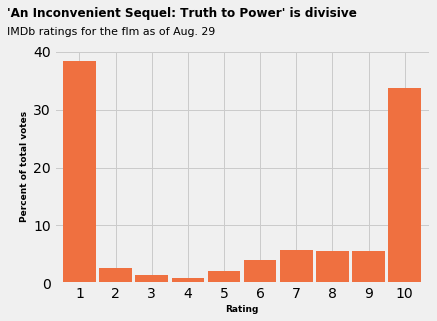

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('fivethirtyeight')
fig = plt.figure

ax = plot_data.plot.bar(color='#ef7040', width =0.9, legend = False)
#fig.patch.set_facecolor('#f9f9f9')

plt.ylabel('Percent of total votes', fontsize=9, fontweight='bold')
plt.xlabel('Rating', fontsize=9, fontweight='bold')

ax.text(x=-2, y=46, s="'An Inconvenient Sequel: Truth to Power' is divisive", fontsize=12, fontweight='bold')
ax.text(x=-2, y=43, s='IMDb ratings for the flm as of Aug. 29', fontsize=11)
ax.tick_params(labelrotation=0)

In [116]:
#For https://fivethirtyeight.com/features/what-the-world-thinks-of-trump/

approval=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/trump-world-trust/TRUMPWORLD-pres.csv')
approval = approval[approval['year'] >= 2015]

approval = approval.dropna(axis=1, how="any")
approval

,year,avg,Canada,France,Germany,Italy,Poland,Spain,UK,Australia,India,Japan,Kenya,Nigeria,South Africa
12,2015,63.161290,76.0,83,73,77.0,64.0,58.0,76,81.0,74.0,66.0,80.0,73.0,77.0
13,2016,73.882353,83.0,84,86,68.0,58.0,75.0,79,84.0,58.0,78.0,83.0,63.0,73.0
14,2017,26.783784,22.0,14,11,25.0,23.0,7.0,22,29.0,40.0,24.0,51.0,58.0,39.0


In [0]:
approval.set_index('year', inplace=True)



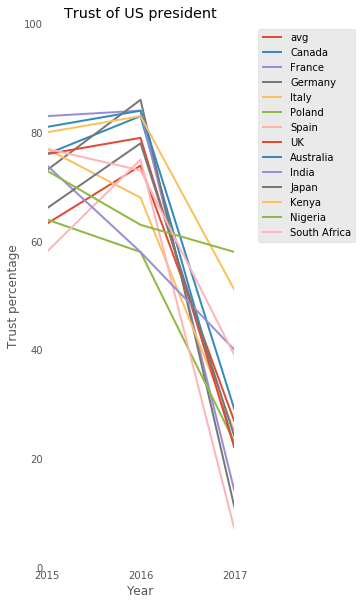

In [146]:

ax = approval.plot(title='Trust of US president', ylim=(0,100),xticks=[2015,2016,2017],figsize=(3, 10), linewidth=2)
ax.legend(bbox_to_anchor=(1.1, 1))
ax.set_xlabel("Year")
ax.set_ylabel("Trust percentage")
ax.set_facecolor('xkcd:white')


In [112]:
approval

,avg,Canada,France,Germany,Italy,Poland,Spain,UK,Australia,India,Japan,Kenya,Nigeria,South Africa
year,,,,,,,,,,,,,,
2015,63.161290,76.0,83,73,77.0,64.0,58.0,76,81.0,74.0,66.0,80.0,73.0,77.0
2016,73.882353,83.0,84,86,68.0,58.0,75.0,79,84.0,58.0,78.0,83.0,63.0,73.0
2017,26.783784,22.0,14,11,25.0,23.0,7.0,22,29.0,40.0,24.0,51.0,58.0,39.0


In [24]:
#The rest of this notebook is my many failed attempts at getting this to work
#https://fivethirtyeight.com/features/how-many-americans-are-married-to-their-cousins/
cousin = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/cousin-marriage/cousin-marriage-data.csv')
cousin

,Country,Percent
0,Burkina Faso,65.8
1,Kuwait,51.7
2,Nigeria,51.2
3,Pakistan,51.0
4,Sudan,50.4
5,Kyrgyzstan,45.2
6,Qatar,44.5
7,Bahrain,44.4
8,Saudi Arabia,38.4
9,Tanzania,37.8


In [26]:
!pip install cartopy

     |████████████████████████████████| 8.9MB 2.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
ERROR: Command "/usr/bin/python3 /usr/local/lib/python3.6/dist-packages/pip/_vendor/pep517/_in_process.py get_requires_for_build_wheel /tmp/tmprhif5xge" failed with error code 1 in /tmp/pip-install-iadpylmx/cartopy


In [60]:
!pip install folium

In [65]:
from google.colab import files

uploaded = files.upload()

MessageError: ignored

In [68]:
import plotly.plotly as py
import pandas as pd
import plotly.graph_objs as go

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

data = [go.Choropleth(
    locations = df['CODE'],
    z = df['GDP (BILLIONS)'],
    text = df['COUNTRY'],
    colorscale = [
        [0, "rgb(5, 10, 172)"],
        [0.35, "rgb(40, 60, 190)"],
        [0.5, "rgb(70, 100, 245)"],
        [0.6, "rgb(90, 120, 245)"],
        [0.7, "rgb(106, 137, 247)"],
        [1, "rgb(220, 220, 220)"]
    ],
    autocolorscale = False,
    reversescale = True,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(180,180,180)',
            width = 0.5
        )),
    colorbar = go.choropleth.ColorBar(
        tickprefix = '$',
        title = 'GDP<br>Billions US$'),
)]

layout = go.Layout(
    title = go.layout.Title(
        text = '2014 Global GDP'
    ),
    geo = go.layout.Geo(
        showframe = False,
        showcoastlines = False,
        projection = go.layout.geo.Projection(
            type = 'equirectangular'
        )
    ),
    annotations = [go.layout.Annotation(
        x = 0.55,
        y = 0.1,
        xref = 'paper',
        yref = 'paper',
        text = 'Source: <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
        showarrow = False
    )]
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: ignored

In [62]:
# Import libraries
import pandas as pd
import folium
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it

#https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json
#state_geo = os.path.join('/Users/y.holtz/Desktop/', 'us-states.json')
state_geo = pd.read_csv('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json')

# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
#state_unemployment = os.path.join('/Users/y.holtz/Desktop/', 'US_Unemployment_Oct2012.csv')

state_data = pd.read_csv('https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/US_Unemployment_Oct2012.csv')
 
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'Unemployment'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Unemployment Rate (%)'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('#292_folium_chloropleth_USA1.html')

ParserError: ignored

In [28]:
!apt-get -qq install python-cartopy python3-cartopy
import cartopy

Selecting previously unselected package python-pkg-resources.
(Reading database ... 130812 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build3_amd64.deb ...
Unpacking python-cartopy:amd64 (0.14.2+dfsg1-2build3) ...
Selecting previously unselected package python3-pkg-resources.
Preparing to unpack .../5-pyth

In [57]:
!pip install geopandas

ImportError: ignored

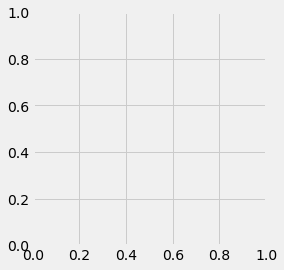

In [59]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot();

/root/.local/share/cartopy/shapefiles/natural_earth/cultural/110m_admin_0_countries.shp
Fiji [0.78039216 0.91372549 0.75294118]
Tanzania [0.45490196 0.76862745 0.4627451 ]
Western Sahara [0.1372549  0.54509804 0.27058824]
Canada [0.63137255 0.85098039 0.60784314]
United States [0.25490196 0.67058824 0.36470588]
Kazakhstan [0.78039216 0.91372549 0.75294118]
Uzbekistan [0.45490196 0.76862745 0.4627451 ]
Papua New Guinea [0.1372549  0.54509804 0.27058824]
Indonesia [0.63137255 0.85098039 0.60784314]
Argentina [0.25490196 0.67058824 0.36470588]
Chile [0.78039216 0.91372549 0.75294118]
Democratic Republic of the Congo [0.45490196 0.76862745 0.4627451 ]
Somalia [0.1372549  0.54509804 0.27058824]
Kenya [0.63137255 0.85098039 0.60784314]
Sudan [0.25490196 0.67058824 0.36470588]
Chad [0.78039216 0.91372549 0.75294118]
Haiti [0.45490196 0.76862745 0.4627451 ]
Dominican Republic [0.1372549  0.54509804 0.27058824]
Russian Federation [0.63137255 0.85098039 0.60784314]
Bahamas [0.25490196 0.67058824

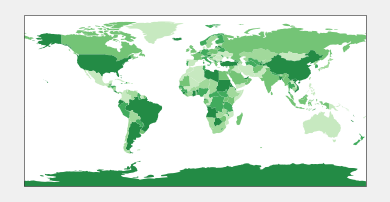

In [55]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.io.shapereader as shpreader
import itertools
import numpy as np

shapename = 'admin_0_countries'
countries_shp = shpreader.natural_earth(resolution='110m',
                                        category='cultural', name=shapename)

print(countries_shp)


earth_colors = np.array([(199, 233, 192),
                         (161, 217, 155),
                         (116, 196, 118),
                         (65, 171, 93),
                         (35, 139, 69),
                        ]) / 255
earth_colors = itertools.cycle(earth_colors)

ax = plt.axes(projection=ccrs.PlateCarree())

for country in shpreader.Reader(countries_shp).records():
    print(country.attributes['NAME_LONG'], next(earth_colors))
    ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                      facecolor=next(earth_colors),
                      label=country.attributes['NAME_LONG'])


In [33]:
!pip install geopandas

     |████████████████████████████████| 901kB 2.8MB/s 
     |████████████████████████████████| 10.8MB 37.9MB/s 
     |████████████████████████████████| 17.9MB 1.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [46]:
!pip install pygal

In [42]:
!pip install pygal_maps_world

In [41]:
!pip install country_codes

  ERROR: Could not find a version that satisfies the requirement country_codes (from versions: none)
ERROR: No matching distribution found for country_codes


In [0]:
pip install pygal_maps_world

In [52]:
import pygal
mm = pygal.maps.world.World()

AttributeError: ignored

In [51]:
import pygal
wm = pygal.maps.world.World()

wm.force_uri_protocol = 'http'

wm.title="Map of Central America"
wm.add('North America',{'ca': 84949494949,'mx': 494794164,'us': 99794616})

wm.render_to_file('map.svg')

worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'Minimum deaths by capital punishement (source: Amnesty International)'
worldmap_chart.add('In 2012', {
  'af': 14,
  'bd': 1,
  'by': 3,
  'cn': 1000,
  'gm': 9,
  'in': 1,
  'ir': 314,
  'iq': 129,
  'jp': 7,
  'kp': 6,
  'pk': 1,
  'ps': 6,
  'sa': 79,
  'so': 6,
  'sd': 5,
  'tw': 6,
  'ae': 1,
  'us': 43,
  'ye': 28
})
worldmap_chart.render()

AttributeError: ignored

In [44]:
import json
from pygal_maps_world.i18n import COUNTRIES
from pygal.maps.world import World
from pygal.style import RotateStyle
from country_codes import get_country_code



filename = "https://raw.githubusercontent.com/mtkilic/Beginners-Python-Examples/master/Data-visualization/population_data.json"


with open(filename) as f:
    pop_date = json.load(f)



cc_populations = {}
for pop_dict in pop_date:
    if pop_dict['Year'] == '2010':
        country_name = pop_dict['Country Name']
        population = int(float(pop_dict['Value']))

        code = get_country_code(country_name)
        if code:
            cc_populations[code] = population

# Group the countries into 3 poplulation levels.

cc_pops_1, cc_pops_2, cc_pops_3 = {}, {}, {}
for cc, pop in cc_populations.items():
    if pop <10000000:
        cc_pops_1[cc] = pop
    elif pop < 1000000000:
        cc_pops_2[cc] = pop
    else:
        cc_pops_3[cc] = pop

# See how many countries are in each level.
print(len(cc_pops_1), len(cc_pops_2), len(cc_pops_3))

wm = World()
wm_style =RotateStyle('#336699')
wm = World(style=wm_style)
wm.title = 'World Population in 2010, by Country'
wm.add('0-10m', cc_pops_1)
wm.add('10m-1b', cc_pops_2)
wm.add('>1b', cc_pops_3)

wm.render_to_file('world_population.svg')

ImportError: ignored

# ASSIGNMENT

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

# STRETCH OPTIONS

#### Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!

#### Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!







